In [6]:
import os
import gdown
from src import config

"""
Download from the needed datasets for the project.
"""

if not os.path.exists(config.DATASET_TRAIN):
    gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)


In [7]:
import pyarrow.parquet as pq
from sklearn import datasets
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

In [8]:
trips.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3588290,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,20.97,0.0,0.5,1.00,0.0,0.3,22.77,NaN,NaN
3588291,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,11.68,0.0,0.0,2.51,0.0,0.3,16.99,NaN,NaN
3588292,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,14.54,0.0,0.5,0.00,0.0,0.3,17.84,NaN,NaN
3588293,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,24.01,0.0,0.5,5.54,0.0,0.3,30.35,NaN,NaN
3588294,2,2022-05-31 23:00:53,2022-05-31 23:07:54,NaN,1.43,NaN,None,238,41,0,10.05,0.0,0.5,2.21,0.0,0.3,15.56,NaN,NaN


In [27]:
# FILTROS (hasta 5/11/2024)
# trips['improvement_surcharge'].value_counts()

filtered_trips = trips[trips['tpep_pickup_datetime'].dt.year == 2022]
filtered_trips.sort_values(by=["tpep_pickup_datetime"], inplace=True, ascending=True)

# filtered_trips.tpep_pickup_datetime.head(20)
# Revisar si dejamos o no los valores en 0 de improvement_surcharge
filtered_trips['improvement_surcharge'].value_counts()

C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_30416\2175875130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips.sort_values(by=["tpep_pickup_datetime"], inplace=True, ascending=True)


improvement_surcharge
 0.3    3566241
-0.3      20663
 0.0       1376
Name: count, dtype: int64

In [ ]:
# TODO : matriz correlacion
# plot payment type vs value relation

In [10]:
filtered_trips.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [11]:
filtered_trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588280e+06,3588280,3588280,3.458756e+06,3.588280e+06,3.458756e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.588280e+06,3.458756e+06,3.458756e+06
mean,1.713102e+00,2022-05-16 08:20:45.738473,2022-05-16 08:38:58.594929,1.393923e+00,6.856872e+00,1.365676e+00,1.645738e+02,1.625518e+02,1.183208e+00,1.516813e+01,1.020730e+00,4.891095e-01,2.824747e+00,5.827744e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008357e-01
min,1.000000e+00,2022-04-30 17:38:24,2022-04-30 18:01:44,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:22,2022-05-08 18:32:40.750000,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:47.500000,2022-05-16 09:33:19.500000,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:19,2022-05-23 18:21:05.250000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888100e-01,NaN,NaN,9.555467e-01,6.908502e+02,5.239800e+00,6.562815e+01,7.027916e+01,5.075987e-01,1.489484e+01,1.256726e+00,9.008897e-02,3.368736e+00,2.173699e+00,4.576916e-02,1.848683e+01,7.452410e-01,3.434470e-01


In [12]:
print(filtered_trips.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [13]:
print(filtered_trips.shape)


(3588280, 19)


In [14]:
import matplotlib.pyplot as plt

def plot_values(data,title, xlabel, ylabel):
  value_counts = data.value_counts()
  value_counts.plot(kind='bar')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [15]:
import pandas as pd
pd.options.display.max_rows = None
filtered_trips.head(5).T

,2109,2110,4487,7280,13222
VendorID,2,2,2,2,2
tpep_pickup_datetime,2022-04-30 17:38:24,2022-04-30 18:04:52,2022-04-30 22:02:51,2022-04-30 22:17:00,2022-04-30 22:19:31
tpep_dropoff_datetime,2022-04-30 18:01:44,2022-05-01 17:34:35,2022-04-30 22:18:42,2022-04-30 22:27:00,2022-04-30 22:28:07
passenger_count,3.0,3.0,1.0,1.0,1.0
trip_distance,12.43,3.82,2.95,2.25,2.95
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,48,50,140,48,79
DOLocationID,31,50,107,239,229
payment_type,2,1,1,1,1


### Agrego una columna de diferencias de fecha

In [28]:
# Calculate the difference in timedelta64[us]
time_delta = filtered_trips['tpep_dropoff_datetime'] - filtered_trips['tpep_pickup_datetime']

# Convert timedelta64[us] to hours (assuming all differences are within the same day)
hours = time_delta.dt.total_seconds() / 3600

# Add the new 'difference_hours' column to the DataFrame
filtered_trips['difference_hours'] = hours

C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_30416\3924045528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips['difference_hours'] = hours


In [29]:
import pandas as pd
pd.options.display.max_rows = None
filtered_trips.head(5).T

,2109,2110,4487,7280,13222
VendorID,2,2,2,2,2
tpep_pickup_datetime,2022-04-30 17:38:24,2022-04-30 18:04:52,2022-04-30 22:02:51,2022-04-30 22:17:00,2022-04-30 22:19:31
tpep_dropoff_datetime,2022-04-30 18:01:44,2022-05-01 17:34:35,2022-04-30 22:18:42,2022-04-30 22:27:00,2022-04-30 22:28:07
passenger_count,3.0,3.0,1.0,1.0,1.0
trip_distance,12.43,3.82,2.95,2.25,2.95
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,48,50,140,48,79
DOLocationID,31,50,107,239,229
payment_type,2,1,1,1,1


### Agrego dos columnas mas 

In [30]:
# Add datetime parameters for tpep_pickup_datetime
filtered_trips["Day"] = filtered_trips.tpep_pickup_datetime.dt.day
filtered_trips["Dayofweek"] = filtered_trips.tpep_pickup_datetime.dt.dayofweek

C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_30416\2569715067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips["Day"] = filtered_trips.tpep_pickup_datetime.dt.day
C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_30416\2569715067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips["Dayofweek"] = filtered_trips.tpep_pickup_datetime.dt.dayofweek


In [31]:
import pandas as pd
pd.options.display.max_rows = None
filtered_trips.head(5).T

,2109,2110,4487,7280,13222
VendorID,2,2,2,2,2
tpep_pickup_datetime,2022-04-30 17:38:24,2022-04-30 18:04:52,2022-04-30 22:02:51,2022-04-30 22:17:00,2022-04-30 22:19:31
tpep_dropoff_datetime,2022-04-30 18:01:44,2022-05-01 17:34:35,2022-04-30 22:18:42,2022-04-30 22:27:00,2022-04-30 22:28:07
passenger_count,3.0,3.0,1.0,1.0,1.0
trip_distance,12.43,3.82,2.95,2.25,2.95
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,48,50,140,48,79
DOLocationID,31,50,107,239,229
payment_type,2,1,1,1,1


In [19]:
print(filtered_trips.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
difference_hours                float64
Day                               int32
Dayofweek                         int32
dtype: object


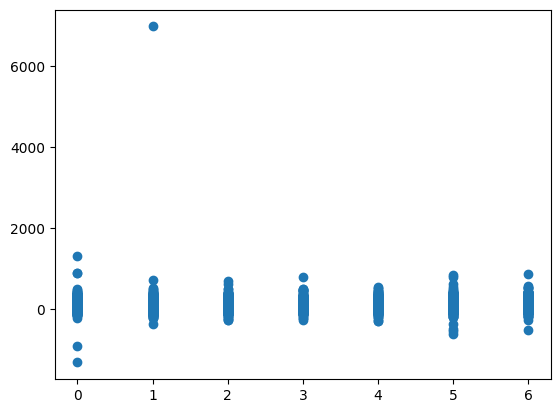

In [32]:
fig, ax = plt.subplots()
ax.scatter(filtered_trips["Dayofweek"], filtered_trips["total_amount"])

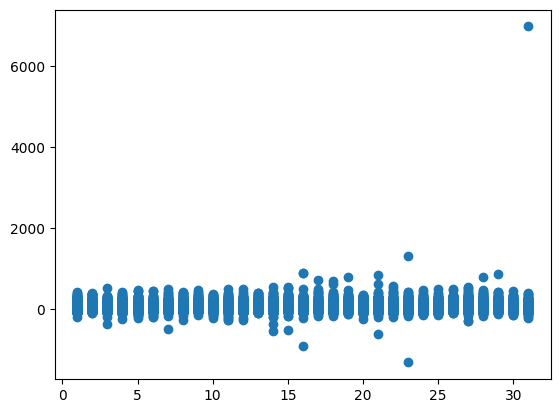

In [33]:
fig, ax = plt.subplots()
ax.scatter(filtered_trips["Day"], filtered_trips["total_amount"])

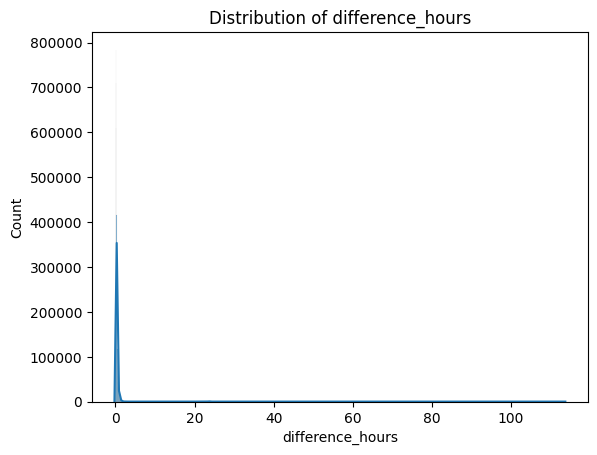

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#filtered_trips = filtered_trips[(filtered_trips['difference_hours']>0) & (filtered_trips['difference_hours']<2.5)]

sns.histplot(filtered_trips['difference_hours'], bins=1581, kde=True)
plt.xlabel('difference_hours')
plt.ylabel('Count')
plt.title('Distribution of difference_hours')
plt.show()

VendorID
2    2527982
1    1054130
6       6154
5         14
Name: count, dtype: int64


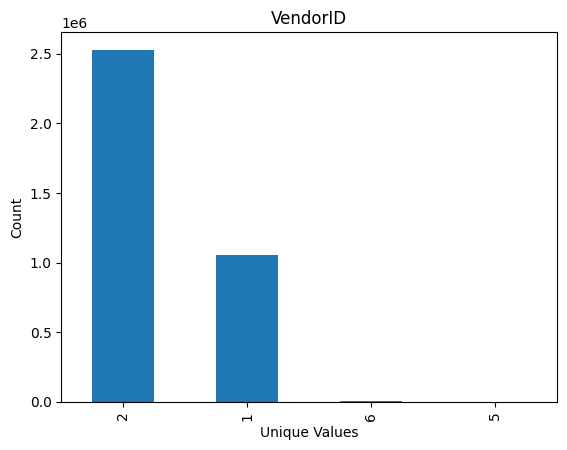

In [36]:
# Count the occurrences of each unique value in the column
value_counts = filtered_trips['VendorID'].value_counts()
print(value_counts)

plot_values(filtered_trips['VendorID'], 'VendorID', 'Unique Values', 'Count')


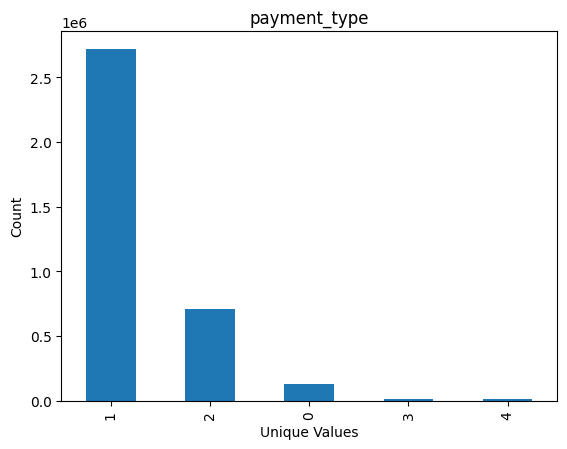

In [128]:
plot_values(filtered_trips['payment_type'], 'payment_type', 'Unique Values', 'Count')


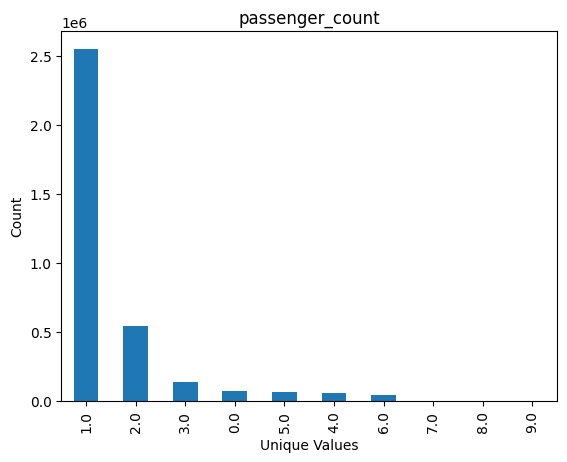

In [129]:
plot_values(filtered_trips['passenger_count'], 'passenger_count', 'Unique Values', 'Count')

## There are trips with 0 passegers? check this

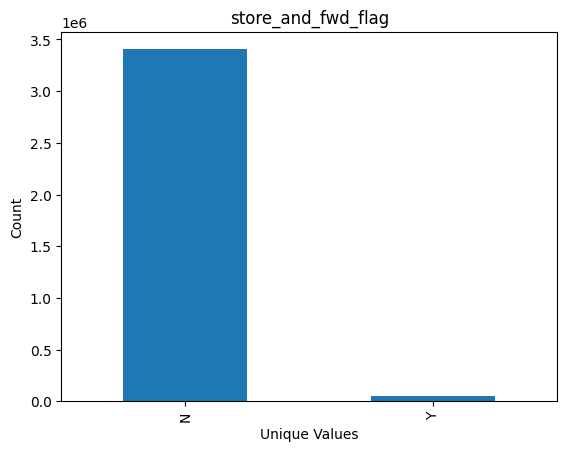

In [130]:
plot_values(filtered_trips['store_and_fwd_flag'], 'store_and_fwd_flag', 'Unique Values', 'Count')


In [131]:
filtered_trips.isnull().sum().sort_index()/len(trips)


DOLocationID             0.000000
Day                      0.000000
Dayofweek                0.000000
PULocationID             0.000000
RatecodeID               0.036096
VendorID                 0.000000
airport_fee              0.036096
congestion_surcharge     0.036096
difference_hours         0.000000
extra                    0.000000
fare_amount              0.000000
improvement_surcharge    0.000000
mta_tax                  0.000000
passenger_count          0.036096
payment_type             0.000000
store_and_fwd_flag       0.036096
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
trip_distance            0.000000
dtype: float64

### Nuevo filtrado

In [44]:
#Nuevo filtrado
import seaborn as sns
import matplotlib.pyplot as plt

filtered_trips = filtered_trips[(filtered_trips['fare_amount']>0) & (trips['fare_amount']<200)]

sns.histplot(filtered_trips['fare_amount'], bins=50, kde=True)
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.title('Distribution of Fare Amounts')
plt.show()

KeyError: 'fare_amount'

In [43]:
#Nuevo filtrado
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(filtered_trips['fare_amount'], bins=50, kde=True)
plt.xlabel('fare_amount')
plt.ylabel('Count')
plt.title('Distribution of fare_amount')
plt.show()

KeyError: 'fare_amount'

trip_distance
1.00     49549
1.10     48794
0.90     48573
1.20     48054
1.30     46827
0.80     46101
1.40     44827
1.50     43201
0.70     41527
1.60     41214
1.70     38611
1.80     36172
0.60     35236
1.90     33863
2.00     31334
2.10     29498
2.20     27318
0.50     26799
2.30     25287
2.40     23282
2.50     21844
2.60     20166
2.70     18701
2.80     17504
0.40     17439
2.90     16166
3.00     15012
3.10     14010
3.20     13121
3.30     12380
3.40     11676
3.50     10674
3.60      9985
0.30      9570
3.70      9480
1.02      9116
1.03      9012
1.12      8949
1.08      8912
0.99      8908
0.96      8894
0.97      8859
1.05      8846
1.01      8841
0.95      8834
1.06      8828
1.14      8828
1.11      8823
1.04      8822
1.09      8820
1.19      8810
1.13      8796
1.07      8788
0.98      8780
1.25      8749
1.26      8733
0.94      8733
1.23      8725
1.17      8713
0.93      8711
1.22      8702
1.16      8696
1.32      8685
0.91      8685
3.80      8676
0.92      8

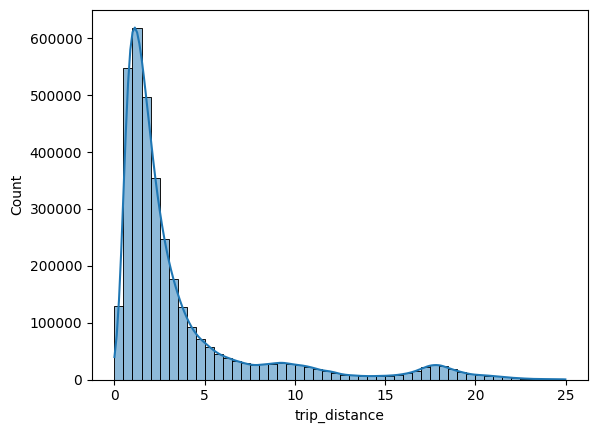

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_trips = filtered_trips[(filtered_trips['trip_distance']>0) & (filtered_trips['trip_distance']<25)]

print(filtered_trips['trip_distance'].value_counts())
sns.histplot(filtered_trips['trip_distance'],bins=50, kde=True)
plt.show()

### Repito con el nuevo filtrado

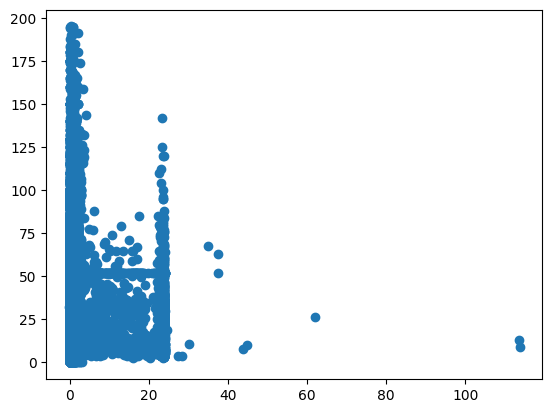

In [26]:
#Repito con el nuevo filtrado
fig, ax = plt.subplots()
ax.scatter(filtered_trips["difference_hours"], filtered_trips["fare_amount"])

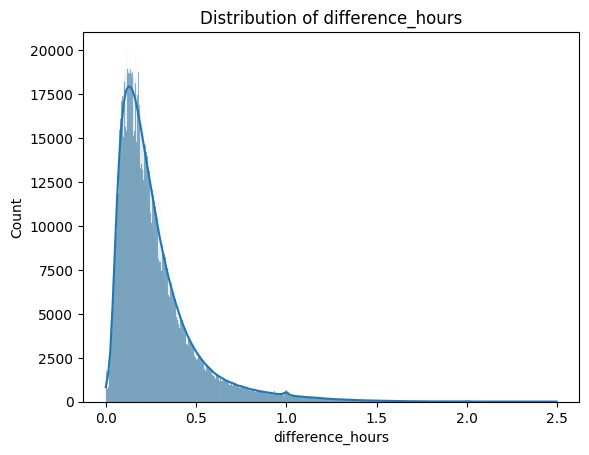

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear una justificación para filtered_trips2-- en este caso,
# limite la diferencia de horas a 2.5hs para obtener un mejor gráfico.
# Pero sigo usando filtered_trips para el analisis y no filtered_trips2
filtered_trips2 = filtered_trips[(filtered_trips['difference_hours']>0) & (filtered_trips['difference_hours']<2.5)]

sns.histplot(filtered_trips2['difference_hours'], bins=1581, kde=True)
plt.xlabel('difference_hours')
plt.ylabel('Count')
plt.title('Distribution of difference_hours')
plt.show()

In [140]:
### show number of columns per data type
filtered_trips.dtypes.value_counts()

float64           13
int64              4
datetime64[us]     2
int32              2
object             1
Name: count, dtype: int64

In [142]:
#x=df_train.dtypes(include='object').columns
#x
a = {'columna':[],'cantidad':[], 'unicos':[]}
x = filtered_trips.select_dtypes(include='object').columns
for y in x:
    a['columna'].append(y)
    a['cantidad'].append(filtered_trips[y].nunique())
    a['unicos'].append(filtered_trips[y].unique())

z=pd.DataFrame(a)
z

,columna,cantidad,unicos
0,store_and_fwd_flag,2,"[N, None, Y]"


In [150]:
#show number of unique values per categorical column (store_and_fwd_flag)

# Count value frequencies
s = pd.value_counts(filtered_trips['store_and_fwd_flag'])

# Create a Series with additional information
s1 = pd.Series({
    'nunique': len(s),
    'unique values': s.index.tolist()
})

# Combine the Series using concatenation
combined_series = pd.concat([s, s1])

# Print the combined Series
print(combined_series)

N                3334176
Y                  53732
nunique                2
unique values     [N, Y]
dtype: object


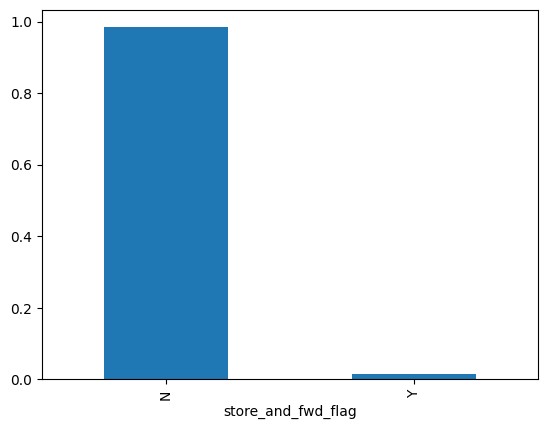

In [151]:
filtered_trips.store_and_fwd_flag.value_counts(normalize=True).plot(kind='bar');

## 2. Preprocessing

### Getting the data

In [5]:
from imp import reload
from src import config, data_utils2

In [9]:
app_train = data_utils2.get_datasets()

In [10]:
app_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [11]:
# Now we execute the function above to get the result
X_train, y_train = data_utils2.get_feature_target(app_train)

In [13]:
# Hasta el momento no tenemos datos para Test
X_train, X_val, y_train, y_val = data_utils2.get_train_val_sets(X_train, y_train)

A1
